<a href="https://colab.research.google.com/github/krithiksag/analysing-the-charcters-in-a-string/blob/main/pretrainedmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="google-bert/bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [2]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased")

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
from transformers import pipeline, AutoTokenizer, AutoModelForMaskedLM

# Initialize the pipeline
fill_mask = pipeline("fill-mask", model="bert-base-uncased")

# Manually input a sentence with a [MASK] token
input_sentence = input()

# Use the pipeline to predict the masked word
predictions = fill_mask(input_sentence)

# Print out the predictions
for prediction in predictions:
    print(f"Option: {prediction['token_str']}, Score: {prediction['score']:.4f}")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

this is a [MASK] coloured pen
Option: brightly, Score: 0.0656
Option: different, Score: 0.0632
Option: light, Score: 0.0496
Option: gold, Score: 0.0494
Option: multi, Score: 0.0373


In [4]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-base')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-base')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


preprocessor_config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(


Image saved to output_image.jpg


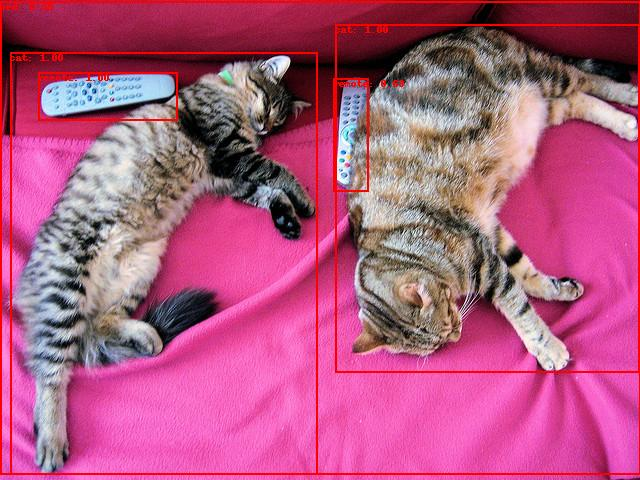

In [6]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image, ImageDraw
import requests
import torch
import os

# Load the image
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Initialize the feature extractor and model
feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-base')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-base')

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Run the model
outputs = model(**inputs)

# Extract the logits and bounding boxes
logits = outputs.logits
bboxes = outputs.pred_boxes

# Post-process the outputs
target_sizes = torch.tensor([image.size[::-1]])
results = feature_extractor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

# Define COCO class labels
COCO_CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# Draw the bounding boxes on the image
draw = ImageDraw.Draw(image)

for score, label, box in zip(results['scores'], results['labels'], results['boxes']):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=2)
    draw.text((box[0], box[1]), f"{COCO_CLASSES[label]}: {score:.2f}", fill="red")

# Save the image with bounding boxes
output_path = "output_image.jpg"
image.save(output_path)
print(f"Image saved to {output_path}")

# Display the image in a Jupyter notebook (if applicable)
from IPython.display import Image as IPImage, display
display(IPImage(filename=output_path))


In [19]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image, ImageDraw
import torch

# Define a function to process the image path and identify objects
def identify_objects_in_image(image_path):
    try:
        # Load the image
        image = Image.open(image_path)

        # Initialize the feature extractor and model
        feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-base')
        model = YolosForObjectDetection.from_pretrained('hustvl/yolos-base')

        # Preprocess the image
        inputs = feature_extractor(images=image, return_tensors="pt")

        # Run the model
        outputs = model(**inputs)

        # Extract the logits and bounding boxes
        logits = outputs.logits
        bboxes = outputs.pred_boxes

        # Post-process the outputs
        target_sizes = torch.tensor([image.size[::-1]])
        results = feature_extractor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

        # Define COCO class labels
        COCO_CLASSES = [
            'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
            'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
            'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
            'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
            'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
            'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
            'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
            'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
            'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
            'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
            'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
            'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
            'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
            'toothbrush'
        ]

        # Draw the bounding boxes on the image
        draw = ImageDraw.Draw(image)

        for score, label, box in zip(results['scores'], results['labels'], results['boxes']):
            box = [round(i, 2) for i in box.tolist()]
            draw.rectangle(box, outline="red", width=2)
            draw.text((box[0], box[1]), f"{COCO_CLASSES[label]}: {score:.2f}", fill="red")

        # Save the image with bounding boxes
        output_path = "output_image.jpg"
        image.save(output_path)
        print(f"Image saved to {output_path}")

        # Display the image in a Jupyter notebook (if applicable)
        from IPython.display import Image as IPImage, display
        display(IPImage(filename=output_path))

    except Exception as e:
        print(f"Error: {e}")




Image saved to output_image.jpg


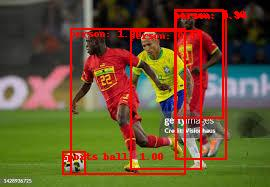

In [21]:
# Example usage with an image path from Google Drive
image_path = '/content/drive/MyDrive/object.jpg'  # Replace with your actual image path
identify_objects_in_image(image_path)

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
